In [ ]:
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import matplotlib.pyplot as plt
import keras_preprocessing
import tensorflow as tf
import numpy as np
import cv2
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Mounting the Directories**

In [ ]:
train_dir = os.path.join("...\\New Plant Diseases Dataset(Augmented)\\train")

In [ ]:
valid_dir = os.path.join("...\\New Plant Diseases Dataset(Augmented)\\valid")

## **Image Augmentation**

In [ ]:
training_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'

)

validation_datagen = ImageDataGenerator(rescale = 1./255)

## **Resizing and creating Batches**

In [ ]:
train_generator = training_datagen.flow_from_directory(
    train_dir,
    target_size = (200,200),
    class_mode = 'categorical',
    batch_size = 120
)

validation_generator = validation_datagen.flow_from_directory(
    valid_dir,
    target_size = (200,200),
    class_mode = 'categorical',
    batch_size = 120
)

Found 70295 images belonging to 2 classes.
Found 17572 images belonging to 2 classes.


## **Model Creation**

In [ ]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (200,200,3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(32,(3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dropout(0.3),
                                    tf.keras.layers.Dense(522, activation = 'relu'),
                                    tf.keras.layers.Dense(2, activation = 'softmax')

])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 16928)             0

## **Compiling and Training the Model**

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

history = model.fit(train_generator, epochs = 10 , validation_data = validation_generator, verbose = True)

Epoch 1/10
586/586 [==============================] - 1935s 3s/step - loss: 0.4688 - accuracy: 0.7895 - val_loss: 0.2028 - val_accuracy: 0.9204
Epoch 2/10
586/586 [==============================] - 1887s 3s/step - loss: 0.1932 - accuracy: 0.9256 - val_loss: 0.0887 - val_accuracy: 0.9669
Epoch 3/10
586/586 [==============================] - 1888s 3s/step - loss: 0.1154 - accuracy: 0.9594 - val_loss: 0.3793 - val_accuracy: 0.8808
Epoch 4/10
586/586 [==============================] - 1884s 3s/step - loss: 0.0826 - accuracy: 0.9728 - val_loss: 0.0571 - val_accuracy: 0.9820
Epoch 5/10
586/586 [==============================] - 1891s 3s/step - loss: 0.0642 - accuracy: 0.9785 - val_loss: 0.0522 - val_accuracy: 0.9855
Epoch 6/10
586/586 [==============================] - 1927s 3s/step - loss: 0.0561 - accuracy: 0.9830 - val_loss: 0.0956 - val_accuracy: 0.9696
Epoch 7/10
586/586 [==============================] - 1906s 3s/step - loss: 0.0499 - accuracy: 0.9855 - val_loss: 0.0839 - val_accuracy:

In [ ]:
train_generator.class_indices

{'Diseased': 0, 'Healthy': 1}

In [ ]:
def get_key(val):
    for a,b in val:
        if a == 1:
            print('Diseased')
        else:
            print('Healthy')

In [ ]:
testing_dir = "...\\New Plant Diseases Dataset(Augmented)\\test"

**PLOTTING ACCURACY/PREDICTION**

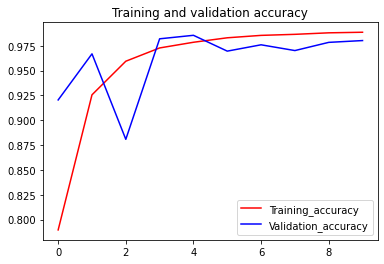

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = "Training_accuracy")
plt.plot(epochs, val_acc, 'b', label = 'Validation_accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc = 0)
plt.figure()

plt.show()

## **Making Prediction**

File Name : AppleCedarRust1.JPG


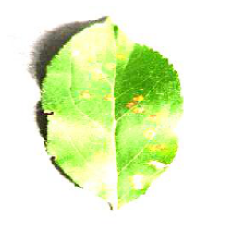

Diseased

 

File Name : AppleCedarRust2.JPG


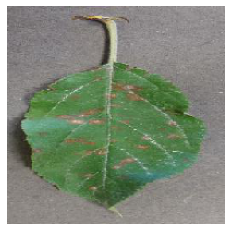

Diseased

 

File Name : AppleCedarRust3.JPG


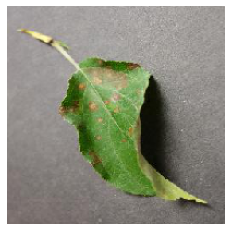

Diseased

 

File Name : AppleCedarRust4.JPG


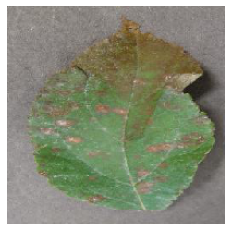

Diseased

 

File Name : AppleScab1.JPG


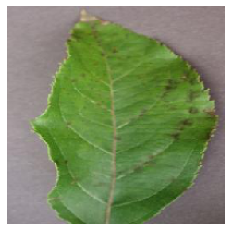

Healthy

 

File Name : AppleScab2.JPG


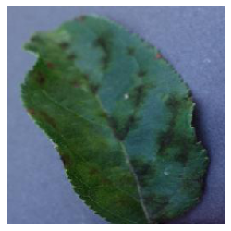

Diseased

 

File Name : AppleScab3.JPG


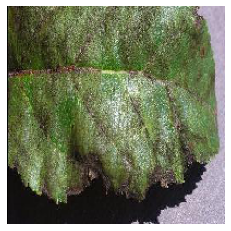

Healthy

 

File Name : CornCommonRust1.JPG


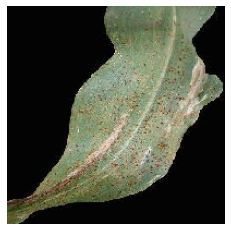

Diseased

 

File Name : CornCommonRust2.JPG


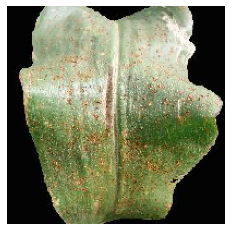

Diseased

 

File Name : CornCommonRust3.JPG


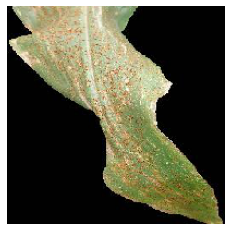

Diseased

 

File Name : PotatoEarlyBlight1.JPG


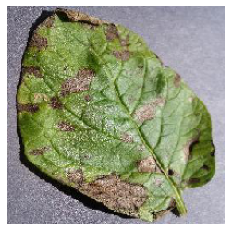

Healthy

 

File Name : PotatoEarlyBlight2.JPG


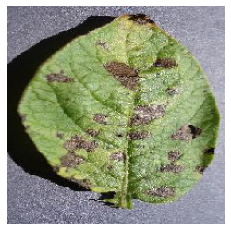

Healthy

 

File Name : PotatoEarlyBlight3.JPG


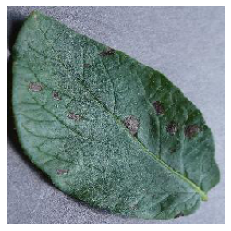

Healthy

 

File Name : PotatoEarlyBlight4.JPG


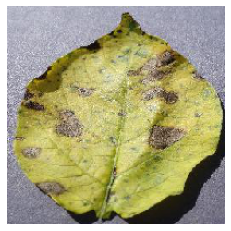

Healthy

 

File Name : PotatoEarlyBlight5.JPG


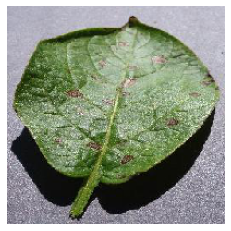

Healthy

 

File Name : PotatoHealthy1.JPG


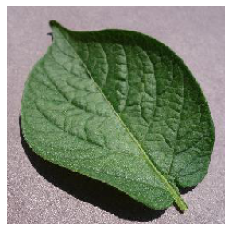

Healthy

 

File Name : PotatoHealthy2.JPG


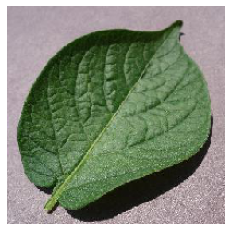

Healthy

 

File Name : TomatoEarlyBlight1.JPG


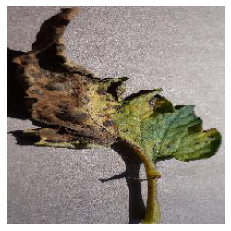

Diseased

 

File Name : TomatoEarlyBlight2.JPG


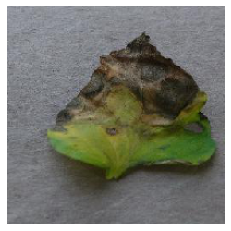

Diseased

 

File Name : TomatoEarlyBlight3.JPG


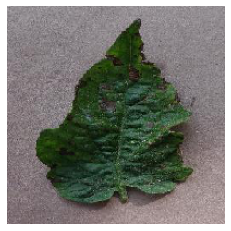

Diseased

 

File Name : TomatoEarlyBlight4.JPG


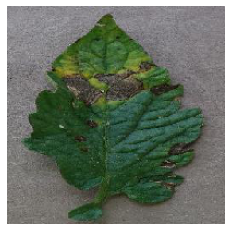

Diseased

 

File Name : TomatoEarlyBlight5.JPG


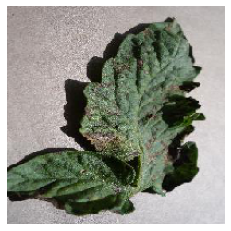

Healthy

 

File Name : TomatoEarlyBlight6.JPG


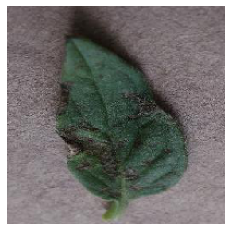

Diseased

 

File Name : TomatoHealthy1.JPG


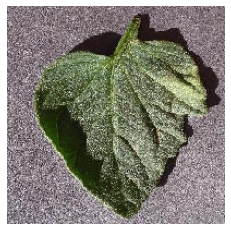

Healthy

 

File Name : TomatoHealthy2.JPG


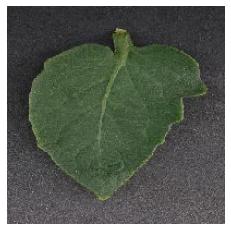

Diseased

 

File Name : TomatoHealthy3.JPG


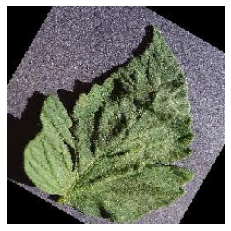

Healthy

 

File Name : TomatoHealthy4.JPG


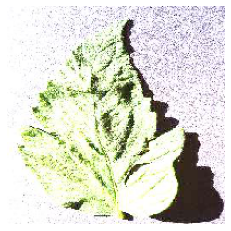

Diseased

 

File Name : TomatoYellowCurlVirus1.JPG


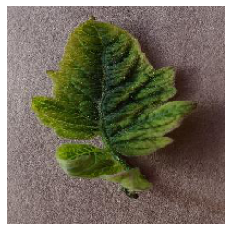

Healthy

 

File Name : TomatoYellowCurlVirus2.JPG


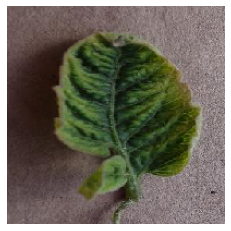

Diseased

 

File Name : TomatoYellowCurlVirus3.JPG


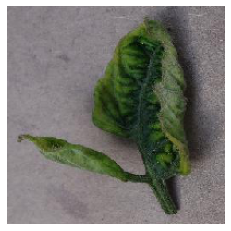

Diseased

 

File Name : TomatoYellowCurlVirus4.JPG


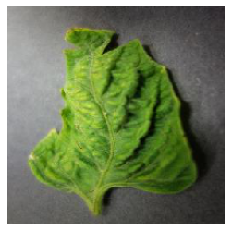

Healthy

 

File Name : TomatoYellowCurlVirus5.JPG


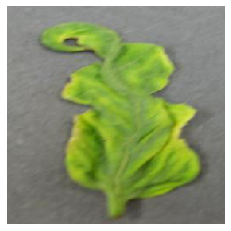

Healthy

 

File Name : TomatoYellowCurlVirus6.JPG


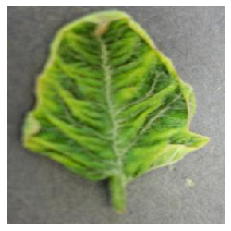

Healthy

 



In [ ]:
for i in os.listdir(testing_dir):
    img = image.load_img(testing_dir+'//'+ i, target_size=(200,200))
    print("File Name : " + i)
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    X = image.img_to_array(img)
    X = np.expand_dims(X, axis=0)
    images = np.vstack([X])
    get_key(model.predict(images))
    print('\n \n')

## **Saving the Model**

In [ ]:
model.save('sn2.sav')

## **Loading the Saved Model**

In [ ]:
testing_dir = "/content/drive/MyDrive/Image"

In [ ]:
saved_model = keras.models.load_model("/content/drive/MyDrive/sn2.sav")

In [ ]:
saved_model

## **Making Predictions using the Saved Model**

File Name : Healthy 4.JPG


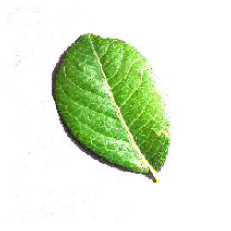

Healthy

 

File Name : Diseased 7.JPG


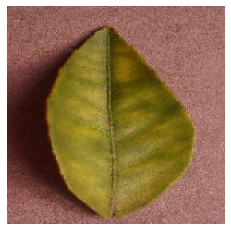

Diseased

 

File Name : Diseased 5.JPG


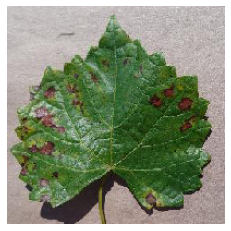

Diseased

 

File Name : Healthy 5.JPG


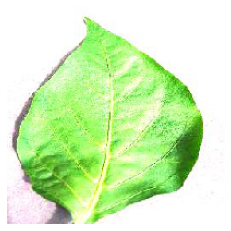

Healthy

 

File Name : Healthy 6.JPG


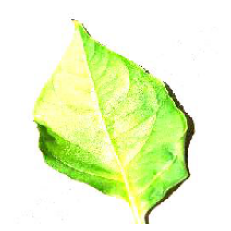

Healthy

 

File Name : Diseased 4.JPG


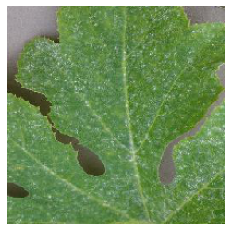

Diseased

 

File Name : Healthy 8.JPG


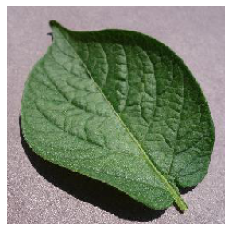

Healthy

 

File Name : Diseased 6.JPG


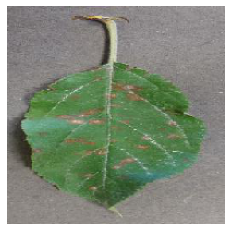

Diseased

 

File Name : Diseased 1.jpg


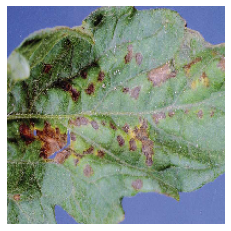

Diseased

 

File Name : Diseased 2.jpg


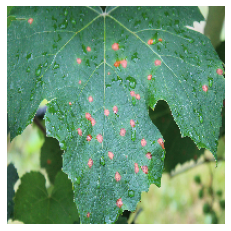

Diseased

 

File Name : Diseased 3.jpg


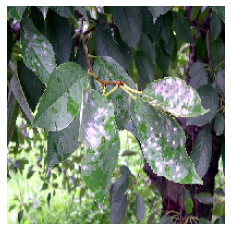

Diseased

 

File Name : Healthy 2.jpg


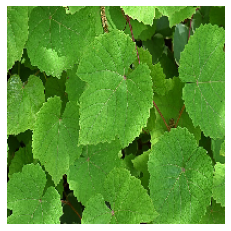

Healthy

 

File Name : Healthy 1.JPG


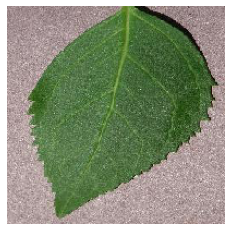

Healthy

 



In [ ]:
for i in os.listdir(testing_dir):
    img = image.load_img(testing_dir+'//'+ i, target_size=(200,200))
    print("File Name : " + i)
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    X = image.img_to_array(img)
    X = np.expand_dims(X, axis=0)
    images = np.vstack([X])
    get_key(saved_model.predict(images))
    print('\n \n')